# General Tree

In [1]:
class Tree_node:
    def __init__(self, data):
        self.data = data
        self.children = []
        self.parent = None


    def add_child(self, child):
        self.children.append(child)
        child.parent = self


    def get_lvl(self):
        level = 0
        p = self.parent
        while p:
            level +=1
            p = p.parent
        return level

    
    def print_tree(self):
        spaces = "   " * self.get_lvl()
        perfix = spaces + "|--" if self.parent else "|--"
        print(perfix, self.data)
        for child in self.children:
            child.print_tree()


    def search_child(self, key):
        if self.data == key:
            return True
        else:
            for child in self.children:
                found = child.search_child(key)
                if found:
                    return True
            return False
  

In [2]:
def create_tree():
    root = Tree_node("Electronics")

    
    laptop = Tree_node("laptop")
    
    laptop.add_child(Tree_node("acer"))
    laptop.add_child(Tree_node("asuse"))
    laptop.add_child(Tree_node("apple"))
    laptop.add_child(Tree_node("msi"))

    
    phones = Tree_node("phones")
    
    phones.add_child(Tree_node("samsung"))
    phones.add_child(Tree_node("iphone"))
    phones.add_child(Tree_node("xiaomi"))
    phones.add_child(Tree_node("honor"))

    
    televisions = Tree_node("televisions")
    
    televisions.add_child(Tree_node("samsung"))
    televisions.add_child(Tree_node("LG"))
    televisions.add_child(Tree_node("xiaomi"))

    root.add_child(laptop)
    root.add_child(phones)
    root.add_child(televisions)
    

    return root

In [3]:
root = create_tree()
root.print_tree()

|-- Electronics
   |-- laptop
      |-- acer
      |-- asuse
      |-- apple
      |-- msi
   |-- phones
      |-- samsung
      |-- iphone
      |-- xiaomi
      |-- honor
   |-- televisions
      |-- samsung
      |-- LG
      |-- xiaomi


In [4]:
root.search_child("msi")

True

In [5]:
root.search_child("lenovo")

False

# Binary Tree (part1)

In [19]:
class Tree_node:
    def __init__(self, data):
        self.data = data
        self.children = []
        self.parent = None


    def add_child(self, child):
        self.children.append(child)
        child.parent = self


    def get_lvl(self):
        level = 0
        p = self.parent
        while p:
            level +=1
            p = p.parent
        return level

    
    def print_tree(self):
        spaces = "   " * self.get_lvl()
        perfix = spaces + "|--" if self.parent else "|--"
        print(perfix, self.data)
        for child in self.children:
            child.print_tree()


    def search_child(self, key):
        if self.data == key:
            return True
        else:
            for child in self.children:
                found = child.search_child(key)
                if found:
                    return True
            return False
  
    def height(self):
        if len(self.children) == 0:
            return 0
        max_height = -1
        for child in self.children:
            max_height = max(max_height, child.height())
        return max_height + 1


    def isbinary(self):
        if len(self.children) > 2:
            return False
        if len(self.children) == 0:
            return True
        for child in self.children:
            if not child.isbinary():
                return False
            return True
            

In [24]:
def create_tree():
    root = Tree_node(15)
    root.add_child(Tree_node(4))
    root.add_child(Tree_node(2))

    root.children[0].add_child(Tree_node(1))
    root.children[0].add_child(Tree_node(8))
    root.children[0].add_child(Tree_node(7))
    root.children[0].children[0].add_child(Tree_node(99))

    

    return root

In [25]:
root = create_tree()
root.print_tree()

|-- 15
   |-- 4
      |-- 1
         |-- 99
      |-- 8
      |-- 7
   |-- 2


In [26]:
root.height()

3

In [27]:
root.isbinary()

True

In [41]:
class Binary_tree:
     def __init__(self, data):
         self.data = data
         self.left = None
         self.right = None


     def add_child(self, data):
         if type(data) != Binary_tree:
             data = Binary_tree(data)
         if self.left is None:
             self.left = data
         elif self.right is None:
             self.right = data
         else:
             self.left.add_child(data)

def isstrict(root):
    if root is None:
        return True
    if root.left==None and root.right==None:
        return True
    if root.left is not None and root.right is not None:
        return isstrict(root.left) and isstrict(root.right)
    return False


def countNodes(root):
    if root is None:
        return 0
    return (1+countNodes(root.left) + 1+countNodes(root.right))


def iscomplete(root, index, number_nodes):
    if root is None:
        return True
    if index >= number_nodes:
        return False
    return (iscomplete(root.left, 2*index+1, number_nodes) and iscomplete(root.right, 2*index+2, number_nodes))

In [49]:
root = Binary_tree(9)
root.add_child(3)
root.add_child(4)
# root.add_child(5)
# root.add_child(6)

In [51]:
print(root.data)
print(root.left.data)
print(root.right.data)
# print(root.left.left.data)
# print(root.left.right.data)

9
3
4


In [52]:
isstrict(root)

True

In [53]:
nodes_count = countNodes(root)
index = 0
if iscomplete(root, index, nodes_count):
    print("the binary tree is complete.")
else:
    print("the binary tree is not complete")

the binary tree is complete.


# Binary Tree (part2 | binary search tree)

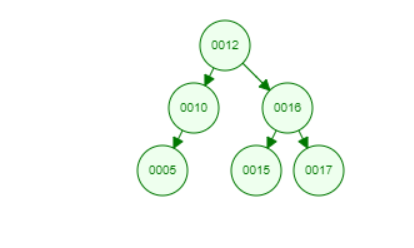

**visualizer website binary search tree:**

- https://www.cs.usfca.edu/~galles/visualization/BST.html

- https://tree-visualizer.netlify.app/

In [58]:
class Binary_search_tree:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    
    def add(self, val):
        if self.data == val:
            return
        
        elif self.data > val:
            if self.left == None:
                self.left = Binary_search_tree(val)
            else:
                self.left.add(val)
            
        else:
            if self.right == None:
                self.right = Binary_search_tree(val)
            else:
                self.right.add(val)


    def search(self, val):
        if self.data == val:
            return True
        elif self.data > val:
            if self.left:
                return self.left.search(val)
            else:
                return False
        else:
            if self.right:
                return self.right.search(val)
            else:
                return False
            

    def inorder_traversal(self): # low to high sort
        # Left-Node-Right
        elements = []
        if self.left:
            elements += self.left.inorder_traversal()
        elements.append(self.data)

        if self.right:
            elements += self.right.inorder_traversal()
            
        return elements

    def preorder_traversal(self):
        # Node-left-Right
        elements = []
        elements.append(self.data)
        if self.left:
            elements += self.left.preorder_traversal()

        if self.right:
            elements += self.right.preorder_traversal()
        
        return elements

    def postorder_traversal(self):
        # Left-Right-Node
        elements = []
        if self.left:
            elements += self.left.postorder_traversal()

        if self.right:
            elements += self.right.postorder_traversal()
        
        elements.append(self.data)
    
        return elements


    def reverse(self):
        self.right, self.left = self.left, self.right

        if self.left:
            return self.left.reverse()

        if self.right:
            return self.right.reverse()
         

In [70]:
elements = [12, 10, 16, 15, 17, 5, 11]
root = Binary_search_tree(elements[0])

for i in elements[1:]:
    root.add(i)

In [71]:
print(root.data)
print(root.left.data)
print(root.right.data)

12
10
16


In [72]:
print(root.inorder_traversal())
print(root.preorder_traversal())
print(root.postorder_traversal())

[5, 10, 11, 12, 15, 16, 17]
[12, 10, 5, 11, 16, 15, 17]
[5, 11, 10, 15, 17, 16, 12]


In [73]:
print(root.search(20))
print(root.search(12))

False
True


In [74]:
print(f"inorder_traversal --> {root.inorder_traversal()}")
root.reverse()
print(f"reverse --> {root.inorder_traversal()}")

inorder_traversal --> [5, 10, 11, 12, 15, 16, 17]
reverse --> [17, 16, 15, 12, 5, 10, 11]
